In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import pandas as pd
import pandasql as ps
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_modelo = pd.read_csv("df_modelo_1.csv")
df_modelo["Churn_int"].value_counts()

Churn_int
0    2278
1     388
Name: count, dtype: int64

In [32]:
# variaveis teste e objetivo
X = df_modelo.drop("Churn_int", axis=1)
y = df_modelo["Churn_int"]

In [36]:
# Treino e Teste
# stratify=y garante que a proporção de churn 0 e 1 seja mantida no treino e no teste.
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify=y, random_state=777)

In [40]:
# Escalonar os dados (Muy importante para regresion Logistica, para que el modelo trabaje mejor)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [63]:
# Treinar o Modelo
# parâmetro class_weight="balanced" : em vez de fazer underslaping, preservo todos os dados de churn e 
# Atribui mais peso ao erro de previsão da classe minoritária, no caso churn = 1

modelo_rl = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=777)
modelo_rl.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=777)

In [65]:
y_pred = modelo_rl.predict(X_test_scaled)

In [67]:
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[351 105]
 [ 16  62]]
              precision    recall  f1-score   support

           0       0.96      0.77      0.85       456
           1       0.37      0.79      0.51        78

    accuracy                           0.77       534
   macro avg       0.66      0.78      0.68       534
weighted avg       0.87      0.77      0.80       534



# usando o csv balanceado com Underslaping

In [92]:
df_balanceado = pd.read_csv("df_balanceado.csv")
df_balanceado["Churn_int"].value_counts()

Churn_int
1    388
0    388
Name: count, dtype: int64

In [74]:
X_b = df_balanceado.drop("Churn_int", axis=1)
y_b = df_balanceado["Churn_int"]

In [78]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split( X_b, y_b, test_size=0.2, stratify=y_b, random_state=777)

In [80]:
# escalonando variables
X_train_scaled_b = scaler.fit_transform(X_train_b)
X_test_scaled_b = scaler.fit_transform(X_test_b)

In [110]:
modelo_rl_b = LogisticRegression(random_state=777)
modelo_rl_b.fit(X_train_scaled_b, y_train_b)

LogisticRegression(random_state=777)

In [112]:
y_pred_b = modelo_rl_b.predict(X_test_scaled_b)

In [114]:
print(confusion_matrix(y_test_b, y_pred_b))

print(classification_report(y_test_b, y_pred_b))

[[62 16]
 [19 59]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        78
           1       0.79      0.76      0.77        78

    accuracy                           0.78       156
   macro avg       0.78      0.78      0.78       156
weighted avg       0.78      0.78      0.78       156



Churn = 0 (classe majoritária): 2.278 registros

Churn = 1 (classe minoritária): 388 registros

Ou seja, uma proporção de ~85% vs 15%, o que é um forte desbalanceamento.

📌 Por que isso é um problema para a regressão logística?
A regressão logística é sensível ao desbalanceamento de classes. Se você treinar com essa proporção:

O modelo tende a prever a classe majoritária (Churn = 0) em quase todos os casos.

Ele pode obter alta acurácia (por prever muitos 0s corretamente), mas baixa capacidade de detectar clientes que dão churn.

Resultado: recall para Churn = 1 será muito baixo, o que é ruim se sua meta for prever quem vai sair.

podemos fazer o uso do class_weight='balanced', ou igualar a variavel churn.
fiz o modelo com os dois e o modelo com o df balanceado saiu melhor, porem ainda assim a melhor opcao é RandomForest

In [9]:
df_metricas = pd.DataFrame({
    'Métrica': ['Precisión', 'Recall', 'F1-Score', 'Accuracy'],
    'Regresión Logística': [0.79, 0.76, 0.77, 0.78],
    'Random Forest': [0.85, 0.8718, 0.8608, 0.8590]
})

# Mostrar el DataFrame
print(df_metricas)

     Métrica  Regresión Logística  Random Forest
0  Precisión                 0.79         0.8500
1     Recall                 0.76         0.8718
2   F1-Score                 0.77         0.8608
3   Accuracy                 0.78         0.8590


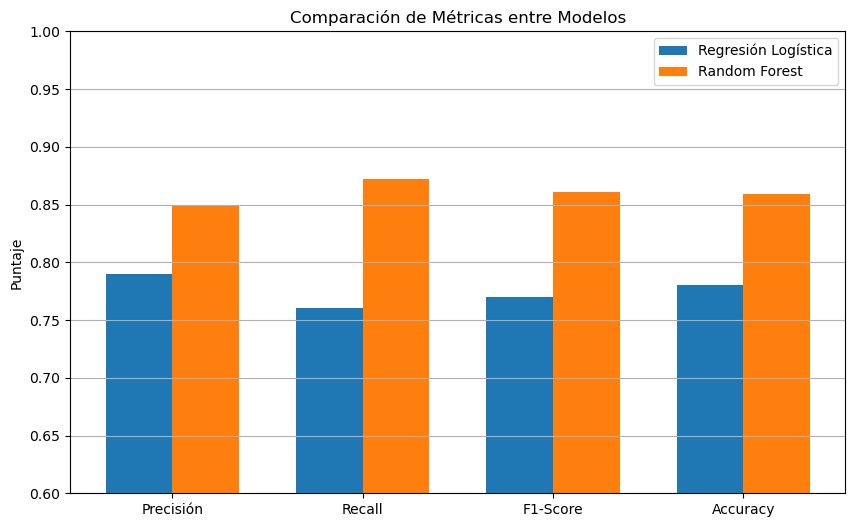

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Métricas de cada modelo
metricas = ['Precisión', 'Recall', 'F1-Score', 'Accuracy']

# Valores obtenidos en tus modelos
logistica = [0.79, 0.76, 0.77, 0.78]
random_forest = [0.85, 0.8718, 0.8608, 0.8590]

x = np.arange(len(metricas))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, logistica, width, label='Regresión Logística')
plt.bar(x + width/2, random_forest, width, label='Random Forest')

plt.ylabel('Puntaje')
plt.title('Comparación de Métricas entre Modelos')
plt.xticks(x, metricas) # Substitui 0,1,2,3 por "Precisión", etc
plt.ylim(0.6, 1.0) # Define o intervalo do eixo Y para facilitar visualização
plt.legend() # Mostra legenda com os nomes dos modelos
plt.grid(axis='y') # mostra as linhas orinzontais 
plt.show()
